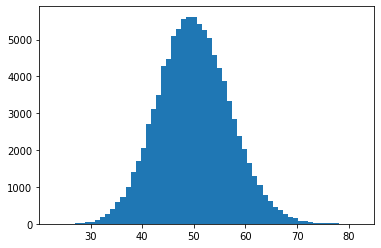

In [26]:
# Poisson process simulation

import numpy as np
import matplotlib.pyplot as plt

T = 25
lam = 2 # intensity

M = int(1e5) # simulation count
X = np.random.poisson(lam*T, size=M)

plt.hist(X, bins=60)
#plt.xlim([0,30])
plt.show()

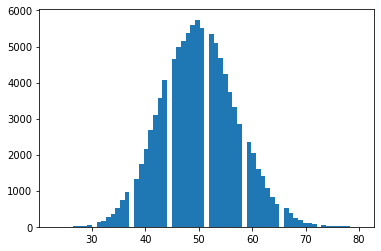

In [29]:
# exponential RV process (poisson process와 짝궁)

T = 25
lam = 2 # intensity

M = int(1e5) # simulation count
X = np.zeros(M)

for i in range(M):
    t= 0.0
    while(t<T):
        tau = np.random.exponential(1/lam) 
        t = t + tau
        
        if(t>=T):
            break
        else:
            X[i] = X[i] + 1 # jump-size가 1인 경우
            
plt.hist(X, bins=65)
plt.show()

In [30]:
# Black-Scholes-Merton Option Pricing with Jump-diffusion

import numpy as np
from scipy import stats

## BSM closed-form solution (for call) ##
def bsm_call_value(S0, K, T, r, sigma):
    d1= (np.log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2= (np.log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    call_value = (S0*stats.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*stats.norm.cdf(d2,0.0,1.0))
    return call_value


## BSMOPM parameter setting ##
S_0= 100.
K= 105.
T= 2.
r= 0.05
sigma= 0.2
avg_jump_num = 2.0 # jump 발생횟수 줄이면 call price가 낮아짐
avg_jump_logsize = 0.0
vol_jump_logsize = 0.2

## Monte Carlo Simulation ##
N = int(1e7)         # Number of sample paths
#W_T = np.random.normal(loc=0.0, scale=np.sqrt(T), size=N)
W_T = np.random.randn(N)*np.sqrt(T)
jump_num = np.random.poisson(lam=avg_jump_num*T, size=N)
jump_size = np.ones(N)

# jump_num 별로 jump_size 시뮬레이션
for i in range(N):
    if(jump_num[i]>0):
        jump_size[i] = np.prod( np.exp( np.random.normal(loc=avg_jump_logsize, scale=vol_jump_logsize, size=jump_num[i])))
        
S_T = S_0*np.exp((r-0.5*sigma*sigma)*T + sigma*W_T)*jump_size
C_0 = np.exp(-r*T)*(S_T-K)*(S_T > K) # 

print('Estimated Call Price (95% C.I.) = ',np.mean(C_0),' +- ',1.96*np.std(C_0)/np.sqrt(N))
print('BSM Call Price = ', bsm_call_value(S_0,K,T,r,sigma))

Estimated Call Price (95% C.I.) =  26.886846662794973  +-  0.02976093545646247
BSM Call Price =  13.639615096767713
